In [1]:
#--------------------
# Import needed modules
#----------------------
import numpy as np
import matplotlib.pyplot as plt
import h5py

In [2]:
#-------------------
# Open data file
# ------------------
fileName = 'H-H1_LOSC_4_V1-815411200-4096.HDF5'

#dataFile is now an object that's treated as a Python dictionary
dataFile = h5py.File(fileName, 'r')

In [7]:
#------------------
# Explore this file
# meta: Meta-data for the file. This is basic information such as the GPS times covered, which instrument, etc.
# quality: Referes to data quality. 1 Hz time series describes data quality for each second of data
# strain: strain data from interferometer. This is the actual data measured by LIGO
#------------------
# key is like a category or label
for key in dataFile.keys():
    print(key)

meta
quality
strain


In [8]:
#---------------
# Read in strain data
#---------------

# Access Strain data object that lives inside the group 'strain'
# Note: Remove the .value to run this code segment
strain = dataFile['strain']['Strain']
# "attribute" 'Xspacing' tells how much time there is between each sample (delta 't') and stored in ts
ts = dataFile['strain']['Strain'].attrs['Xspacing']

In [11]:
#--------------------------
# Print out some meta data
#--------------------------
print("\n\n")
metaKeys = dataFile['meta'].keys()
meta = dataFile['meta']
for key in metaKeys:
    #Note: print key, meta[key].value must be changed to print(key, meta[key])
    print(key, meta[key])




Description <HDF5 dataset "Description": shape (), type "|S33">
DescriptionURL <HDF5 dataset "DescriptionURL": shape (), type "|S21">
Detector <HDF5 dataset "Detector": shape (), type "|S2">
Duration <HDF5 dataset "Duration": shape (), type "<i8">
GPSstart <HDF5 dataset "GPSstart": shape (), type "<i8">
Observatory <HDF5 dataset "Observatory": shape (), type "|S1">
Type <HDF5 dataset "Type": shape (), type "|S16">
UTCstart <HDF5 dataset "UTCstart": shape (), type "|S19">


In [30]:
#------------------------
# Create a time vector
#------------------------

# change meta['GPSstart'].value to meta['GPSstart'][()] 
# This change passes the ('index operator') to an empty tuple[()] in order to get its stored scalar values
gpsStart = meta['GPSstart'][()]

# change meta['GPSstart'].value to meta[('Duration')]
# This change passes the ('index operator') to an empty tuple[()] in order to get its stored scalar values
duration = meta['Duration'][()]
#print(gpsStart, duration)

gpsEnd = gpsStart + duration
time = np.arange(gpsStart, gpsEnd, ts)

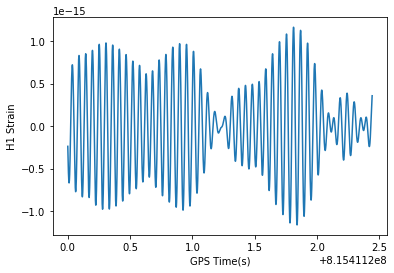

In [32]:
# -------------
# Plot the time series
# ------------

numSamples = 10000
plt.plot(time[0:numSamples], strain[0:numSamples])
plt.xlabel('GPS Time(s)')
plt.ylabel('H1 Strain')
plt.show()